# 多クラス分類モデル


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.options.display.max_columns = None

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# データの前処理

In [5]:
# 目的変数をカテゴリー変数に展開
dataset2 = pd.get_dummies(data=dataset, columns=['species'])
dataset2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
Y = np.array(dataset2[['species_0', 'species_1', 'species_2']])
X = np.array(dataset2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# モデルの構築

In [8]:
model = keras.Sequential()

model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

2022-03-21 07:40:30.002727: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 07:40:30.002767: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 07:40:30.002793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-10-220): /proc/driver/nvidia/version does not exist
2022-03-21 07:40:30.002991: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-03-21 07:40:30.010347: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300060000 Hz
2022-03-21 07:40:30.010648: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd354000b20 initialized for platform Host (this does not guarante

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


# 学習の実施

In [10]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 [==============================] - 0s 65ms/step - loss: 1.8379 - accuracy: 0.4110 - val_loss: 2.4614 - val_accuracy: 0.2812
Epoch 2/5000
3/3 [==============================] - 0s 10ms/step - loss: 1.6466 - accuracy: 0.4110 - val_loss: 2.2761 - val_accuracy: 0.2812
Epoch 3/5000
3/3 [==============================] - 0s 10ms/step - loss: 1.5414 - accuracy: 0.4110 - val_loss: 2.0857 - val_accuracy: 0.2812
Epoch 4/5000
3/3 [==============================] - 0s 10ms/step - loss: 1.4475 - accuracy: 0.4110 - val_loss: 1.9755 - val_accuracy: 0.2812
Epoch 5/5000
3/3 [==============================] - 0s 9ms/step - loss: 1.3864 - accuracy: 0.4110 - val_loss: 1.8633 - val_accuracy: 0.2812
Epoch 6/5000
3/3 [==============================] - 0s 9ms/step - loss: 1.3248 - accuracy: 0.4110 - val_loss: 1.7580 - val_accuracy: 0.2812
Epoch 7/5000
3/3 [==============================] - 0s 9ms/step - loss: 1.2694 - accuracy: 0.4110 - val_loss: 1.6496 - val_accuracy: 0.2812
Epoch 8/5000
3/3

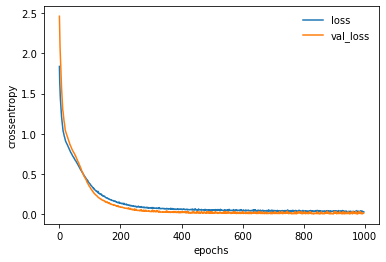

In [11]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

# テストデータによる評価

In [12]:
Y_pred_0 = model.predict(X_test)

In [13]:
Y_pred_0 #左から順に、speacies0,1,2の確率。

array([[7.6193376e-18, 2.4889969e-05, 9.9997509e-01],
       [1.4551481e-08, 9.9974173e-01, 2.5827027e-04],
       [1.0000000e+00, 8.9034225e-15, 3.8542405e-16],
       [1.3652746e-18, 9.3791947e-05, 9.9990618e-01],
       [1.0000000e+00, 3.6693641e-11, 9.4820289e-13],
       [6.3186505e-21, 9.7985037e-07, 9.9999905e-01],
       [1.0000000e+00, 1.2342490e-11, 3.3811409e-13],
       [4.7787158e-10, 9.9980587e-01, 1.9414595e-04],
       [2.7232985e-10, 9.9941528e-01, 5.8471231e-04],
       [6.8143908e-09, 9.9988616e-01, 1.1382286e-04],
       [5.4222015e-16, 3.4675768e-04, 9.9965322e-01],
       [1.1068085e-09, 9.9985600e-01, 1.4396661e-04],
       [1.3173147e-09, 9.9851280e-01, 1.4871313e-03],
       [3.9953618e-10, 9.9879503e-01, 1.2049392e-03],
       [5.2374749e-10, 9.9408084e-01, 5.9191613e-03],
       [1.0000000e+00, 7.3625589e-13, 3.6034211e-14],
       [8.4230484e-10, 9.9667078e-01, 3.3292959e-03],
       [3.3897865e-09, 9.8994166e-01, 1.0058349e-02],
       [1.0000000e+00, 2.433

In [14]:
Y_pred = np.argmax(Y_pred_0, axis=1) #予測結果の各リストにおける最大値のインデックスを取得するようにする

In [15]:
Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
Y_test_ = np.argmax(Y_test, axis=1) #カテゴリー変数の復元

# モデルの評価

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

